In [ ]:
%load_ext autoreload
%autoreload 2

In [6]:
import sys
sys.path.insert(0,'/home/pawel1/Pulpit/Astrophysics/CTA/soft/ctapipe_io_lst')
sys.path.insert(0, '/home/pawel1/Pulpit/Astrophysics/CTA/cta-lstchain')

from ctapipe_io_lst import LSTEventSource
from traitlets.config.loader import Config 

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

from ctapipe.image.extractor import LocalPeakWindowSum


from lstchain.calib.camera.r0 import LSTR0Corrections

from tools import get_first_capacitor
from time_cal_corr_all_camera import TimeCalCorr
from time_cal_corr import plot_corr_curve, make_hist
plt.rcParams['font.size'] = 25

In [2]:
n_combine = 8
n_harm = 16
n_cap = 1024
n = int(n_cap/n_combine)
timeCorr = TimeCalCorr(n_combine, n_harm, n_cap)

config_corr = Config({
    "LSTR0Corrections": {
        "pedestal_path": "/media/pawel1/ADATA HD330/20190215/pedestal_run97_new.fits",
        "offset":  400,
        "tel_id": 0, # for EVB3 will be 
    }
})

#input_file_1 = "/media/pawel1/ADATA HD330/20190226/LST-1.*.Run00171.0000.fits.fz"
input_file_1 = "/media/pawel1/ADATA HD330/20190312/LST-1.*.Run00250.0000.fits.fz"

In [3]:
reader = LSTEventSource(input_url=input_file_1, max_events=10000)
lst_r0 = LSTR0Corrections(config=config_corr)

timeCorr = TimeCalCorr(n_combine, n_harm, n_cap)


for i, ev in enumerate(reader):
    if ev.r0.event_id%200 == 0:
        print(ev.r0.event_id)
    lst_r0.calibrate(ev)
    timeCorr.calib_pulse_time(ev)

200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800
10000


In [4]:
timeCorr.finalize()

/home/pawel1/Pulpit/Astrophysics/CTA/low_level_calib_drs4/time_corr/time_cal_corr_all_camera.py:47: RuntimeWarning: divide by zero encountered in true_divide
  self.fMeanVal = self.fMeanVal /self.fNumMean
/home/pawel1/Pulpit/Astrophysics/CTA/low_level_calib_drs4/time_corr/time_cal_corr_all_camera.py:47: RuntimeWarning: invalid value encountered in true_divide
  self.fMeanVal = self.fMeanVal /self.fNumMean


error = 0.014583532404508794


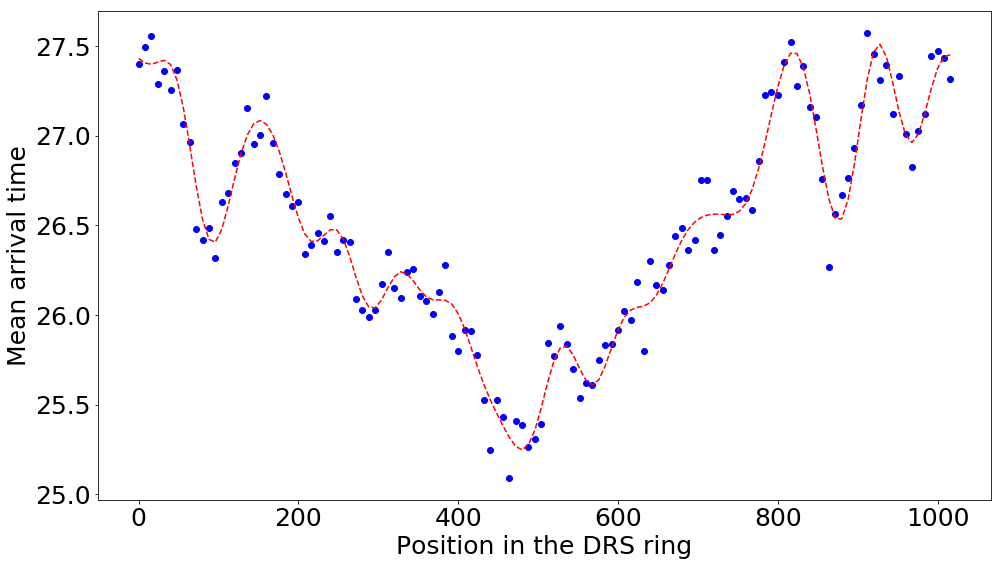

error = 0.01603570450147357


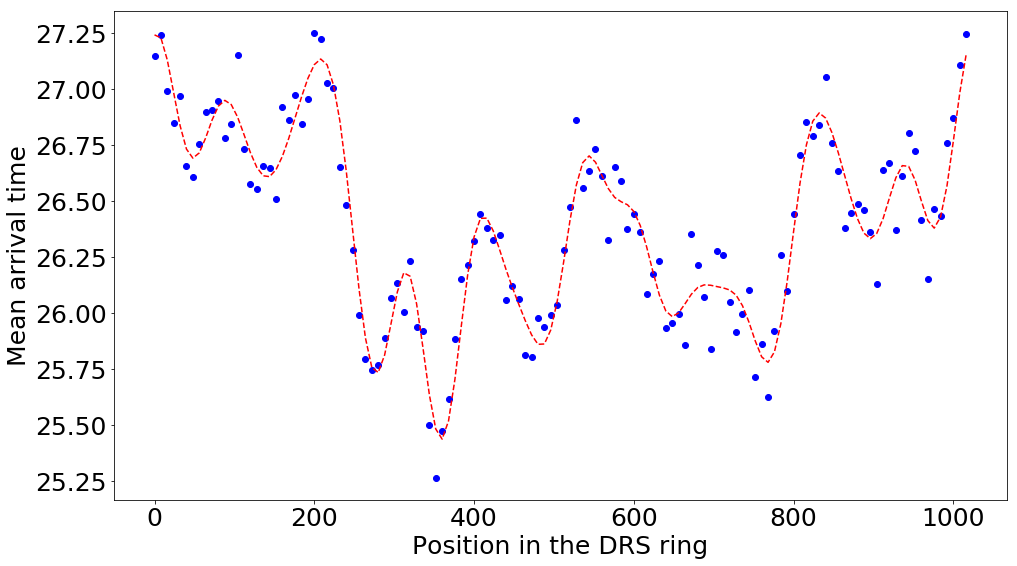

error = 0.015455191944116075


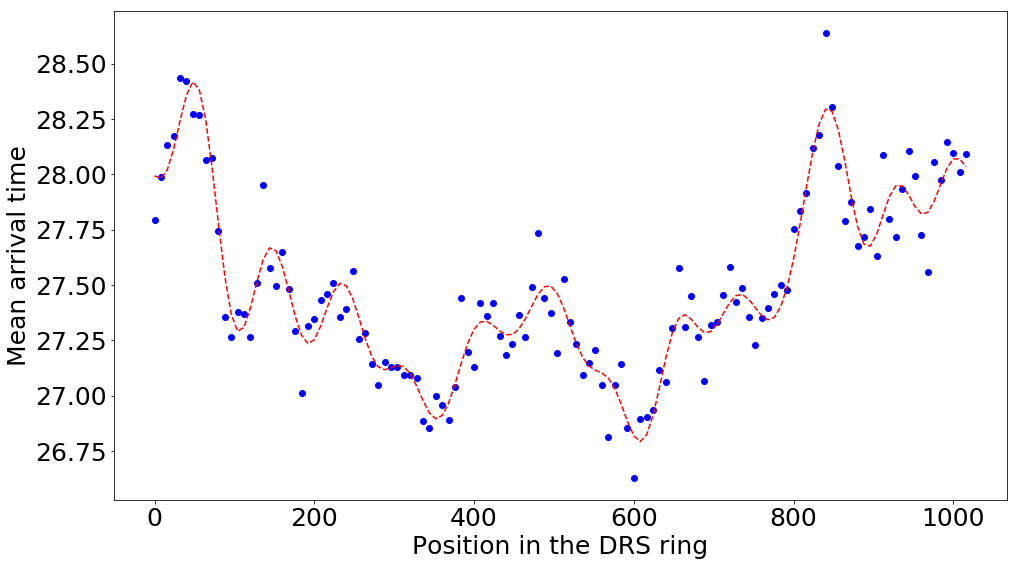

error = 0.015932144997307565


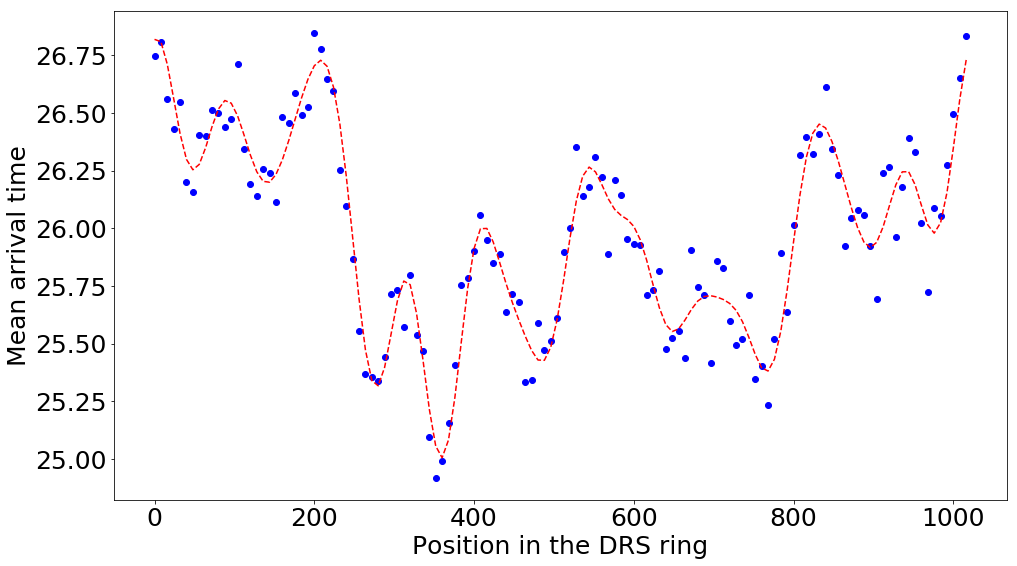

error = 0.015146620111271927


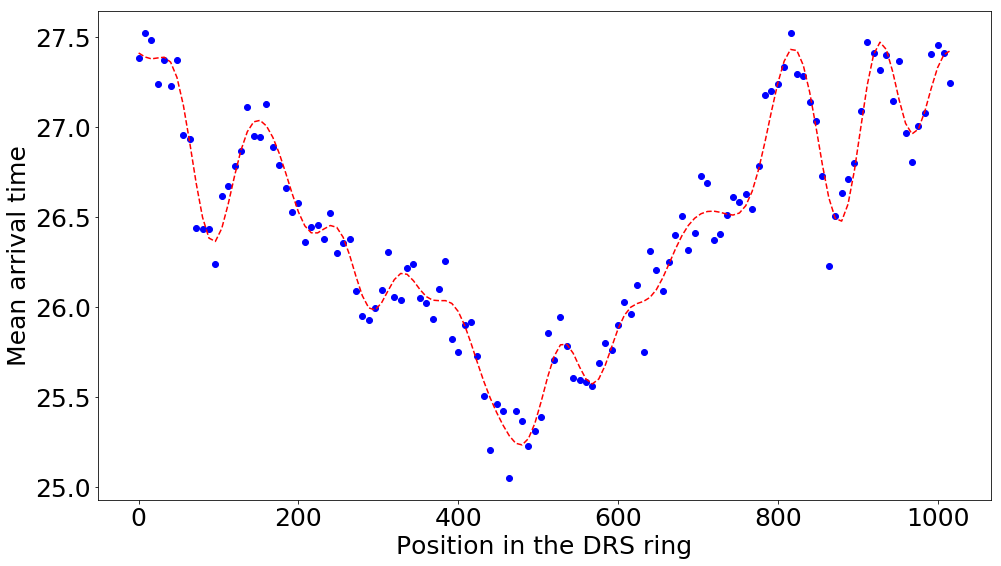

In [7]:
for pix_id in range(0, 5):
    pixel_id = pix_id
    timeCorr.fit(pix_id)
    an = timeCorr.fan
    bn = timeCorr.fbn
    fMeanVal = timeCorr.fMeanVal[pix_id]
    plot_corr_curve(n, n_cap, n_combine, an, bn, fMeanVal)
    plt.show()